In [1]:
import numpy as np
import matplotlib.pyplot as plt

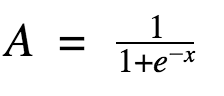

In [40]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [41]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [42]:
# input datasets

# inputs = np.array([ [0, 0],
#                     [0, 1],
#                     [1, 0],
#                     [1, 1] ])

# expected_output = np.array( [[0],
#                              [1],
#                              [1],
#                              [0] ])

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

In [43]:
epochs = 100000
lr = 0.01
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [53]:
#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))


hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

In [54]:
print("Initial hidden weights: ", end=" ")
print(*hidden_weights)
print("Initial hidden biases: ", end=" ")
print(*hidden_bias)
print("Initial output weights: ", end=" ")
print(*output_weights)
print("Initial output biases: ", end=" ")
print(*output_bias)


Initial hidden weights:  [0.85218397 0.66979497] [0.28165834 0.76809353]
Initial hidden biases:  [0.51863228 0.49733781]
Initial output weights:  [0.43482591] [0.83213026]
Initial output biases:  [0.43351441]


In [57]:
# Training algorithm
# MLP

cost_history = []

for _ in range(epochs):
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)
    
    #Backpropagation
    error = expected_output - predicted_output
    cost_history.append(- error[0][0])
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

    

print("Final hidden weights: ", end=" ")
print(*hidden_weights)
print("Final hidden biases: ", end=" ")
print(*hidden_bias)
print("Final output weights: ", end=" ")
print(*output_weights)
print("Final output biases: ", end=" ")
print(*output_bias)

print("\nOutput from neural network after 1000 epochs: ", end='')
print("Z1, Z2")
print(*predicted_output)

Final hidden weights:  [4.16056411 6.25907704] [4.14118165 6.16850491]
Final hidden biases:  [-6.36902345 -2.69945254]
Final output weights:  [-9.28206095] [8.55817841]
Final output biases:  [-3.89770158]

Output from neural network after 1000 epochs: Z1, Z2
[0.0331063] [0.97066007] [0.97082601] [0.03081728]


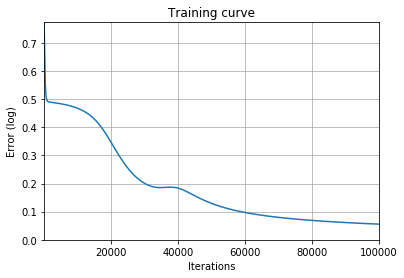

In [56]:
# plot learning curve
plt.plot(range(1, len(cost_history)+1), cost_history)
plt.grid(True)
plt.xlim(1, len(cost_history))
plt.ylim(0, max(cost_history))
plt.title("Training curve")
plt.xlabel("Iterations")
plt.ylabel("Error (log)")
plt.show()

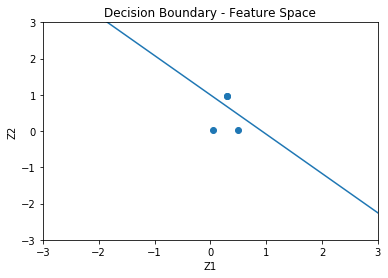

In [58]:
x = np.arange(-10, 10)

m = output_weights[0] / output_weights[1]
b = output_weights[-1] / output_weights[1]

plt.scatter([0.05, 0.3, 0.3, 0.5], predicted_output)
plt.plot(x, m*x + b)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("Decision Boundary - Feature Space")
plt.ylabel("Z2")
plt.xlabel("Z1")
plt.show()

## Margins

Margins / Distances from points


W = -9.28206095 8.55817841

||w|| = sqrt(-0.732) = 0.855

For closed circle pattern: [-9.28 , 8.55] * [0,  1] - 3.89 = = 4.66/ 0.855 = 5.45 = 5.45 ~ 5

Fore open circle Pattern: [-9.28 , 8.55]  * [1,  1] - 3.89 =  = -3.16/ 0.855 = -3.69 = 3.69 ~ 4